Setup

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, color 
from skimage.util import img_as_float

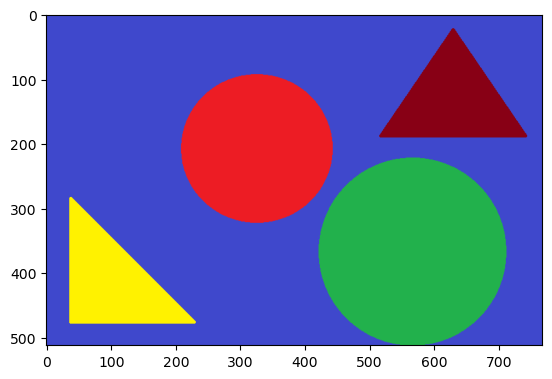

In [4]:
#load the pic. and show
img = io.imread('data/resources/shapes.png')
plt.imshow(img)
plt.show()

In [5]:
#show the resolution of the pic
def show_resolution(image):
    print(f'The Image shape is {image.shape[1]} x {image.shape[0]}')
#shape[0] is the first dimension-row,[1] is second dimension-column
show_resolution(img)

The Image shape is 768 x 512


In [6]:
#normalize the pic from unit8 to float(0.0-1.0)
def normalize_as_float(image):
    return image.astype(float) / 255.0
img_float = normalize_as_float(img)

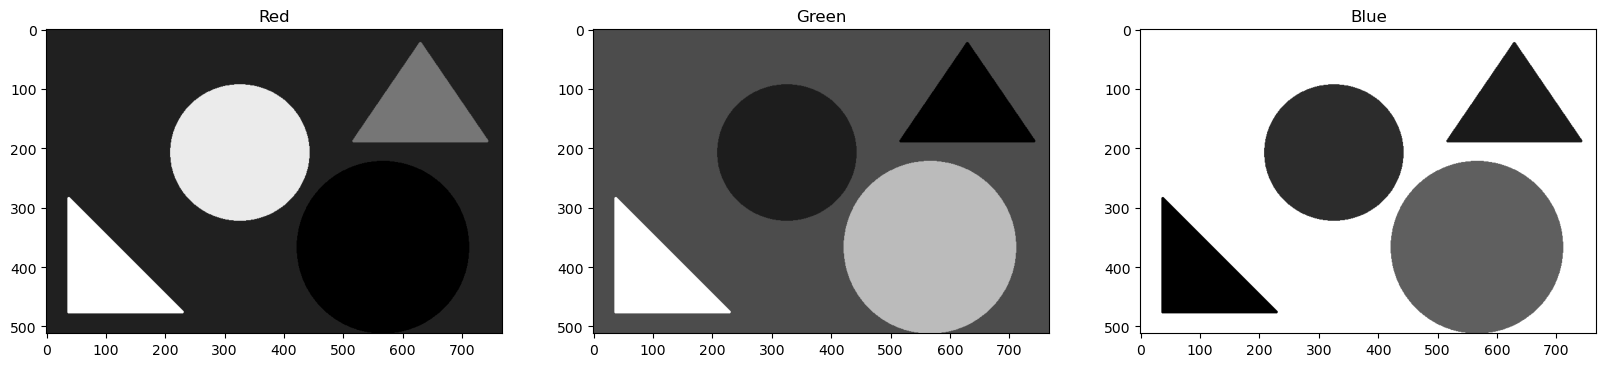

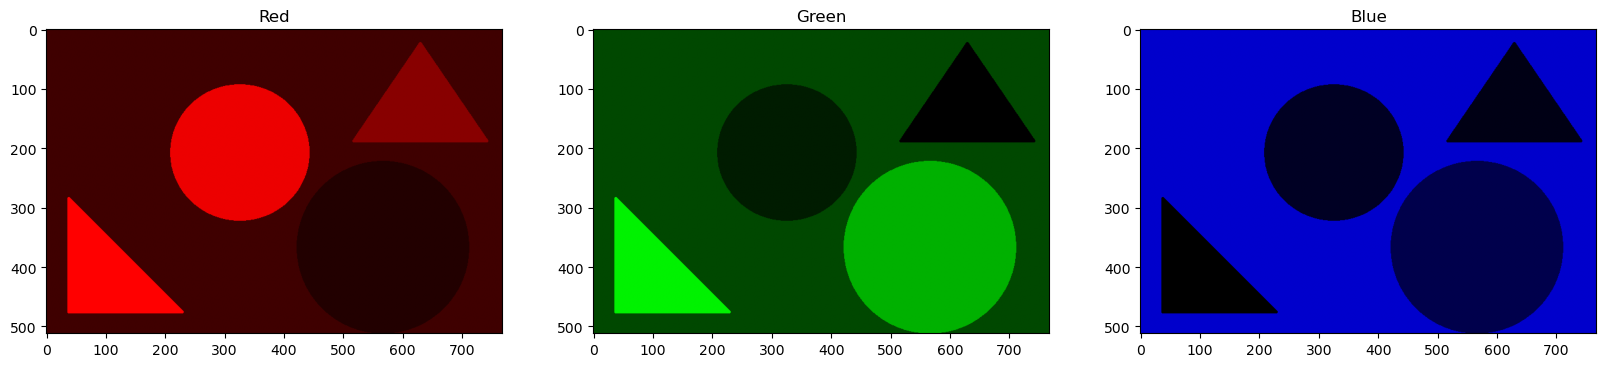

In [7]:
#seperate the color tunnel
#1.under gray colormap (camp = gray)
r, g, b = np.split(img_float, 3, axis=2)#through the third dimension(color)
_, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(r, cmap='gray'),ax[0].set_title('Red')
ax[1].imshow(g, cmap='gray'),ax[1].set_title('Green')
ax[2].imshow(b, cmap='gray'),ax[2].set_title('Blue')
plt.show()

#2.no colormap
img_r = img_float.copy()
img_r[:,:,1:] = 0 #set [1] and [2] in third dimension to 0,only red color left
img_g = img_float.copy()
img_g[:,:,(0,2)] = 0
img_b = img_float.copy()
img_b[:,:,:2] = 0

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(img_r),axs[0].set_title('Red')
axs[1].imshow(img_g),axs[1].set_title('Green')
axs[2].imshow(img_b),axs[2].set_title('Blue')
plt.show()

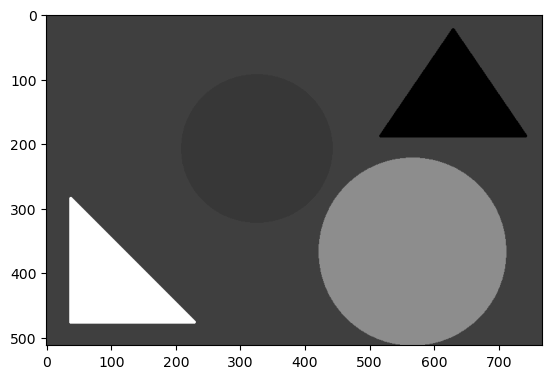

In [8]:
#rgb to gray color image
img_gray = color.rgb2gray(img_float)
#color.rgb2gray use the Y = 0.2125 R + 0.7154 G + 0.0721 B 
plt.imshow(img_gray, cmap='gray')
plt.show()

Histogram Equalization:usually used on gray scale

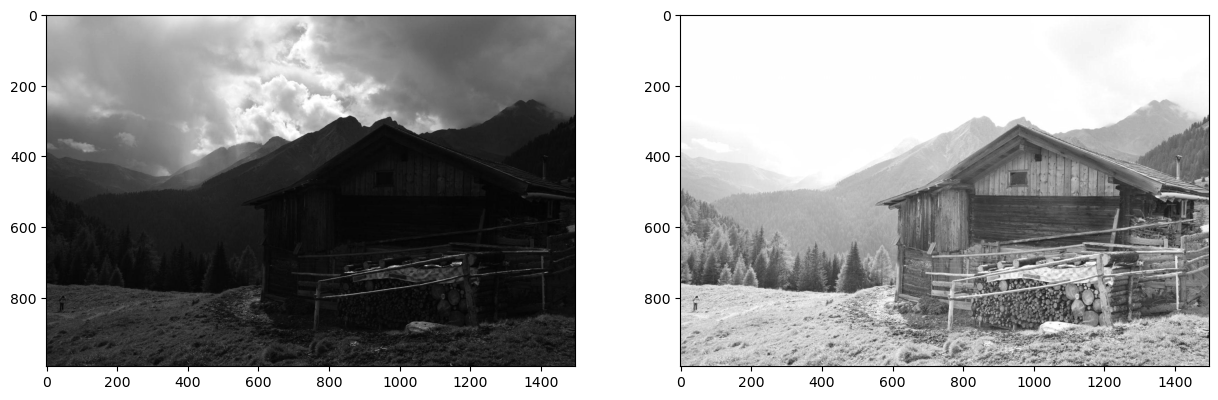

In [9]:
#read the pic and transform to gray scale image
shed_2 = normalize_as_float(io.imread('data/resources/shed_2.png'))
shed_3 = normalize_as_float(io.imread('data/resources/shed_3.png'))
#to gray
shed2_gray = color.rgb2gray(shed_2)
shed3_gray = color.rgb2gray(shed_3)
#show the pic
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(shed2_gray, cmap='gray')
axs[1].imshow(shed3_gray, cmap='gray')
plt.show()

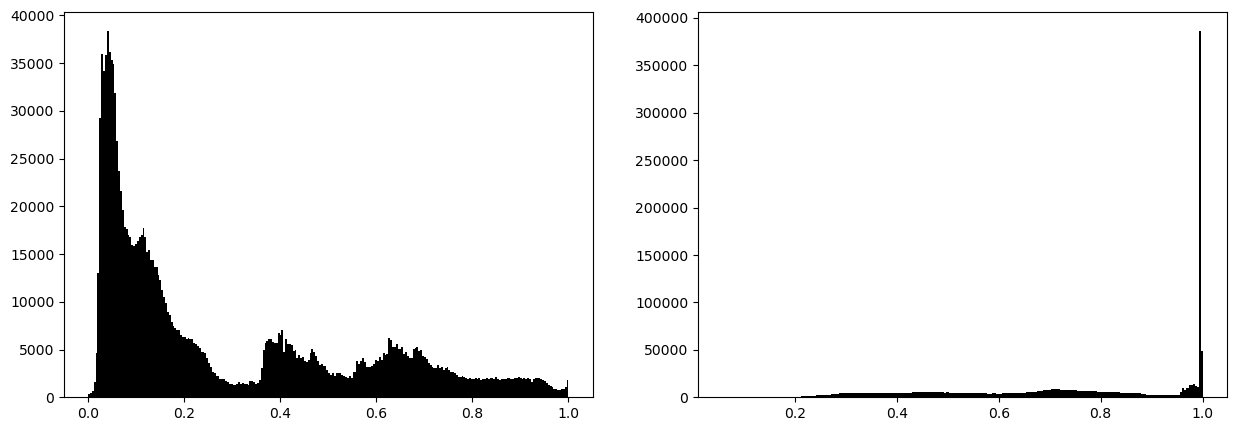

In [10]:
#show and compare the Histogram
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(shed2_gray.flatten(), bins=256, histtype='bar',color='black')#draw the hist
axs[1].hist(shed3_gray.flatten(), bins=256, histtype='bar',color='black')
plt.show()

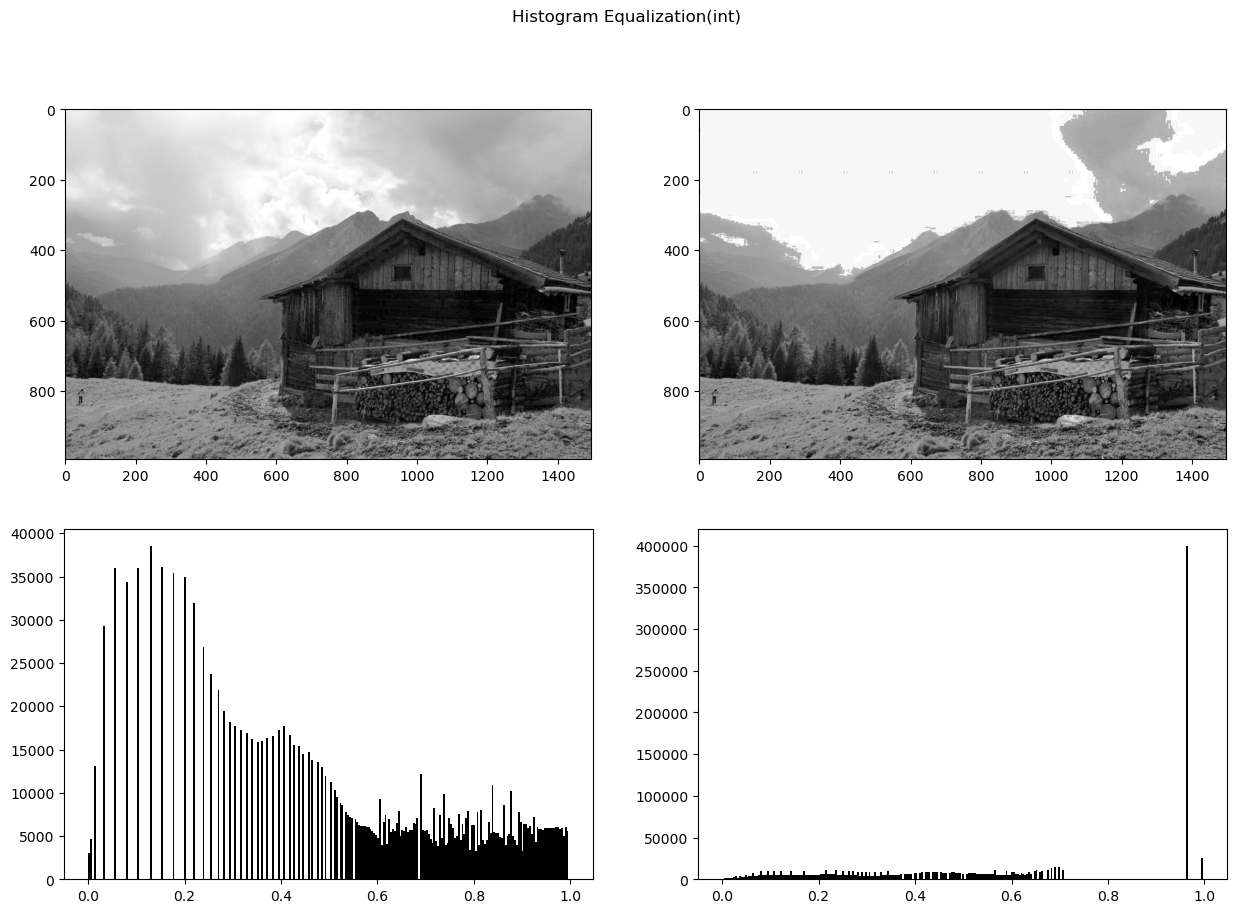

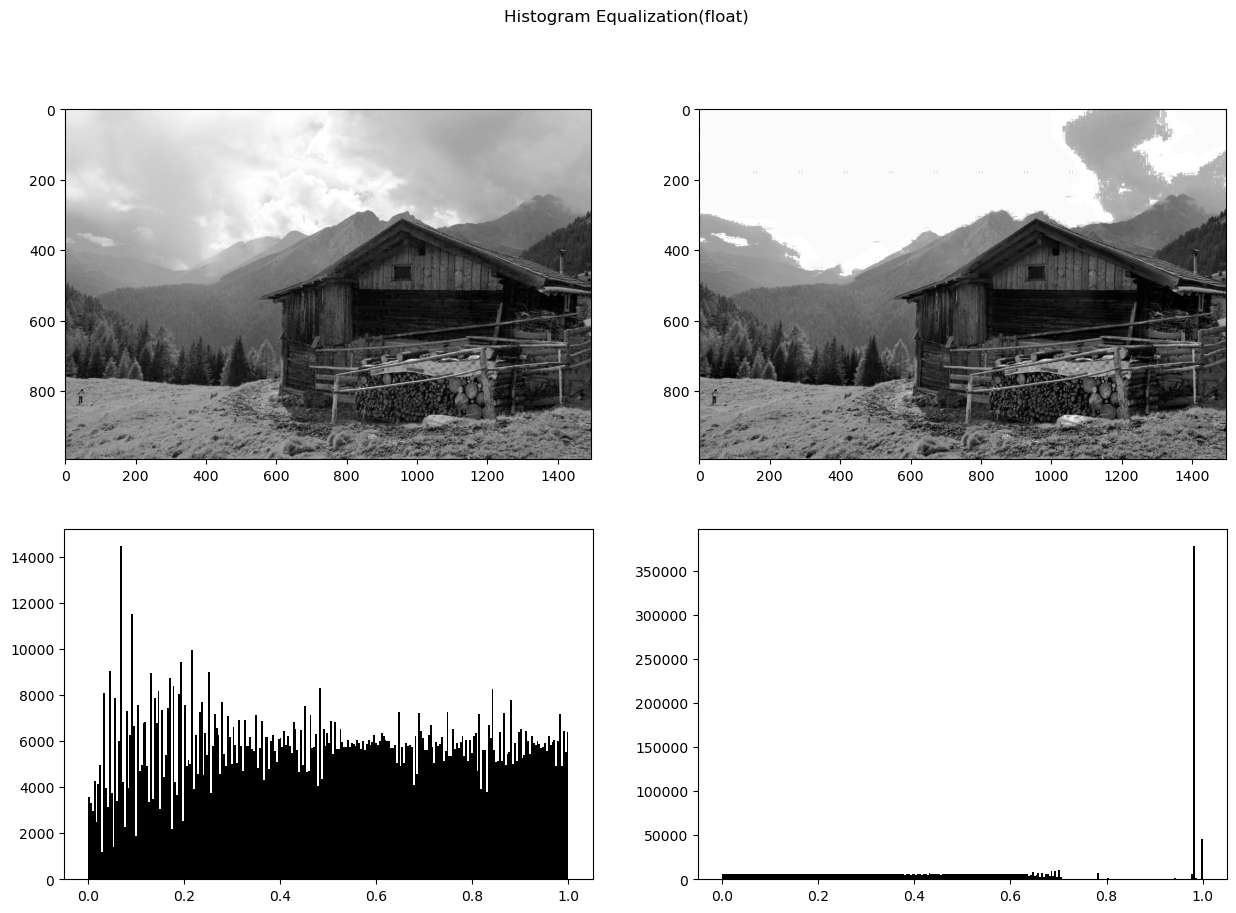

In [11]:
#define the Histogram Equalization algorithm
def hist_equ_int(image):
    img_int = (image * 255).astype(np.uint8)
#calculate the Probability and cdf
    counts, values = exposure.histogram(image, nbins=256)
    probabilities = counts / (image.shape[0] * image.shape[1])
    cdf = np.cumsum(probabilities)
#round the cdf to get the scaled image
    cdf_scaled = (cdf * 255).astype(np.uint8)
    image_eq = np.zeros(image.shape, dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_eq[i, j] = cdf_scaled[img_int[i, j]]
    return normalize_as_float(image_eq)

def hist_equ_float(image):
    counts, values = exposure.histogram(image, nbins=256)
    cdf_ready = np.cumsum(counts)
    cdf = cdf_ready/(image.shape[0] * image.shape[1])
    
    image_eq = np.interp(image.flat, values, cdf)
    image_eq = image_eq.reshape(image.shape)
    return image_eq

def plot_hist(images):
    fig, axs = plt.subplots(2, len(images), figsize=(7.5 * len(images), 10))
    for i,image in enumerate(images):
        axs[0,i].imshow(image, cmap='gray')
        axs[1,i].hist(image.flatten(), bins=256, histtype='bar',color='black')
#result in int
shed2_eq_int = hist_equ_int(shed2_gray)
shed3_eq_int = hist_equ_int(shed3_gray)

plot_hist([shed2_eq_int, shed3_eq_int])
plt.suptitle("Histogram Equalization(int)")
plt.show()
#result in float
shed2_eq_float = hist_equ_float(shed2_gray)
shed3_eq_float = hist_equ_float(shed3_gray)
plot_hist([shed2_eq_float, shed3_eq_float])
plt.suptitle('Histogram Equalization(float)')
plt.show()

for shed_3 is the contrast of the sky bot good,therefore we apply Contrast_limited Adaptive Histogram Equalization (CLAHE) 

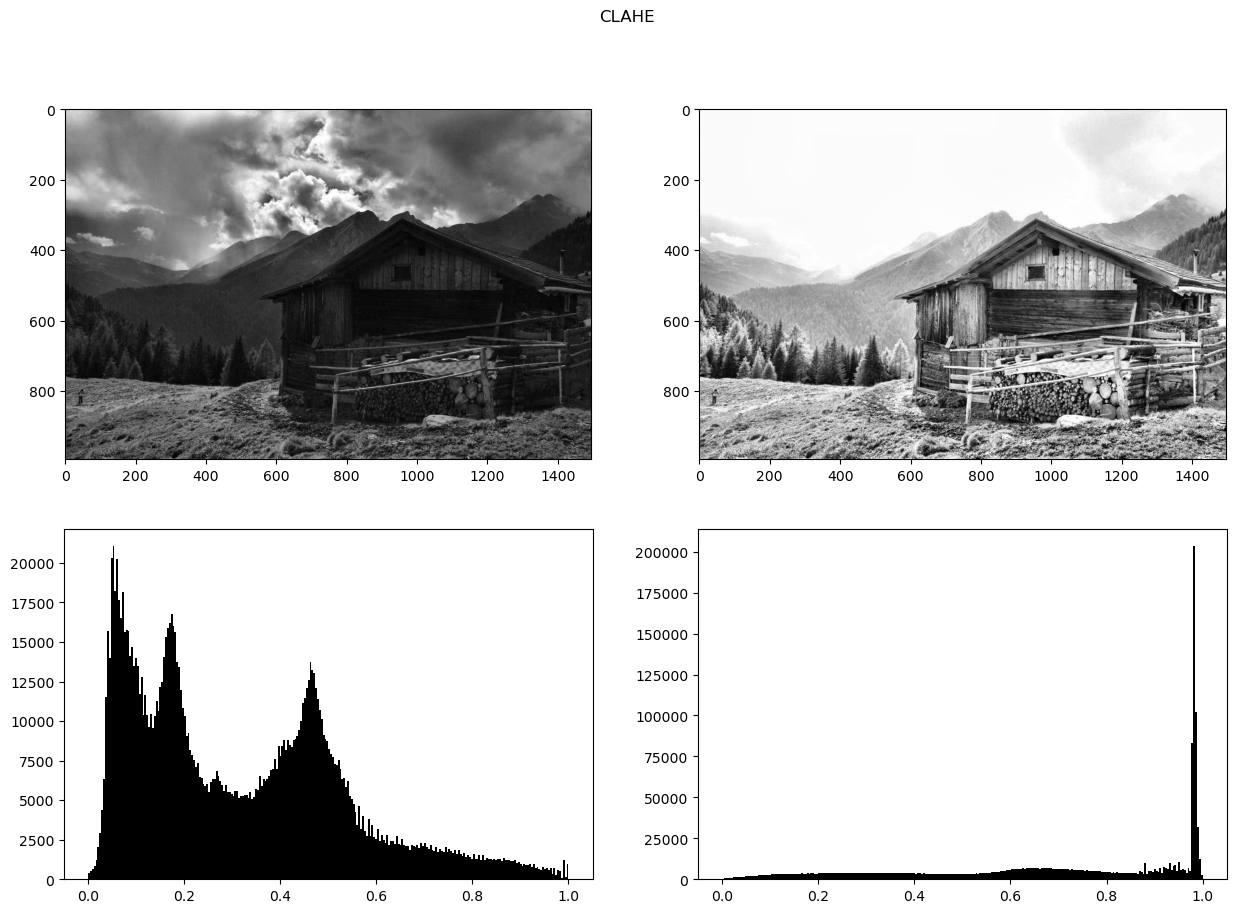

In [12]:
kernel_size = None
clip_limit = 0.01
shed_2_clahe = exposure.equalize_adapthist(shed2_gray, kernel_size=kernel_size, clip_limit=clip_limit)
shed_3_clahe = exposure.equalize_adapthist(shed3_gray, kernel_size=kernel_size, clip_limit=clip_limit)

plot_hist([shed_2_clahe, shed_3_clahe])
plt.suptitle('CLAHE')
plt.show()

interactive(children=(FloatSlider(value=0.01, description='clip_limit', layout=Layout(width='90%'), max=1.0, m…

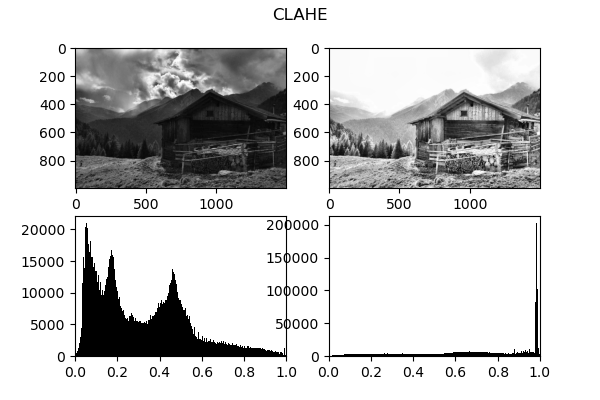

In [20]:
#interactive clahe
%matplotlib widget
import ipywidgets as widgets


fig, axs = plt.subplots(2, 2, figsize=(12/2,8/2))
fig.suptitle("CLAHE")

def update(clip_limit):
    shed_2_eq = exposure.equalize_adapthist(shed2_gray, clip_limit=clip_limit)
    shed_3_eq = exposure.equalize_adapthist(shed3_gray, clip_limit=clip_limit)
    
    axs[0, 0].clear()
    axs[0, 0].imshow(shed_2_eq, cmap='gray')
    
    axs[0, 1].clear()
    axs[0, 1].imshow(shed_3_eq, cmap='gray')
    axs[1, 0].clear()
    axs[1, 0].hist(shed_2_eq.flatten(), bins=256, histtype='bar', color='black')[0]
    axs[1, 0].set_xlim(0, 1)
    
    axs[1, 1].clear()
    axs[1, 1].hist(shed_3_eq.flatten(), bins=256, histtype='bar', color='black')[0]
    axs[1, 1].set_xlim(0, 1)

clip_limit_slider = widgets.FloatSlider(value=0.01, min=0.005, max=1.0, step=0.001, readout_format='.3f', layout=widgets.Layout(width='90%'))
widgets.interact(update, clip_limit=clip_limit_slider);